In [3]:
import numpy as np
import scipy
import seaborn as sns
import sklearn
import pandas as pd
# Useful for saving our models.
import pickle

# Plotting packages.
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Sets the matplotlib backend for the notebook.
# sets the backend of matplotlib to the 'inline' backend: 
# With this backend, the output of plotting commands is 
# displayed inline within the Jupyter notebook, 
# directly below the code cell that produced it
%matplotlib inline 

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

print('Finished successfully loading packages')


Finished successfully loading packages


Question 1

In [459]:


df = pd.read_csv('housingUnits.csv')
print(df.head())

   housing_median_age  total_rooms  total_bedrooms  population  households  \
0                  41          880             223         322         126   
1                  21         7099            1338        2401        1138   
2                  52         1467             328         496         177   
3                  52         1274             293         558         219   
4                  52         1627             357         565         259   

   median_income  ocean_proximity  median_house_value  
0       208.1300                1              452600  
1       207.5350                1              358500  
2       181.4350                1              352100  
3       141.0775                1              341300  
4        96.1550                1              342200  


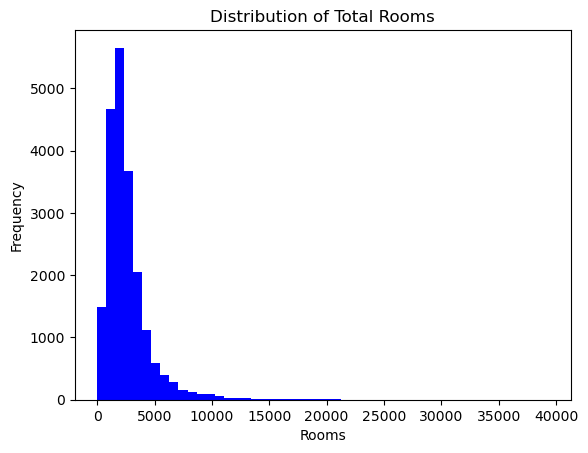

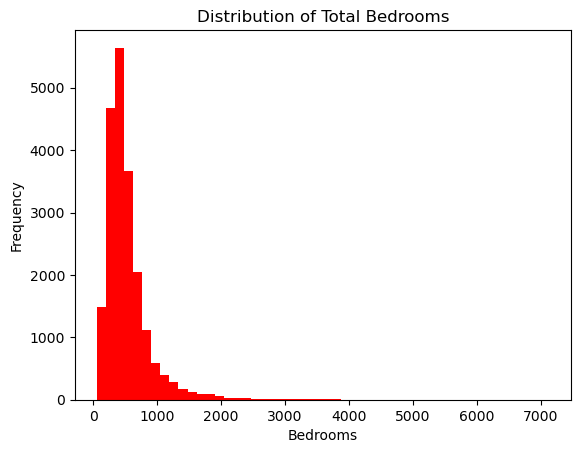

In [460]:

plt.hist(df['total_rooms'],bins = 50, color='blue')
plt.title('Distribution of Total Rooms')
plt.xlabel('Rooms')
plt.ylabel('Frequency')
plt.show()

plt.hist(df['total_bedrooms'], bins = 50, color='red')
plt.title('Distribution of Total Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Frequency')

plt.show()

In [461]:
print("The correlation between population and median house value is", df["population"].corr(df["median_house_value"]))
print("The correlation between households and median house value is",df["households"].corr(df["median_house_value"]))

The correlation between population and median house value is -0.024649678888894893
The correlation between households and median house value is 0.06584265057005649


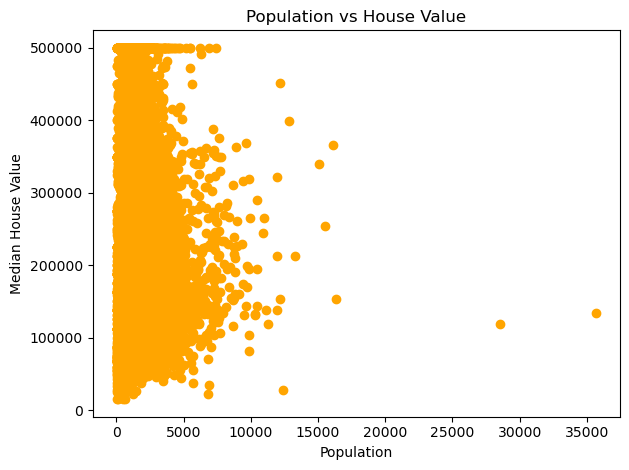

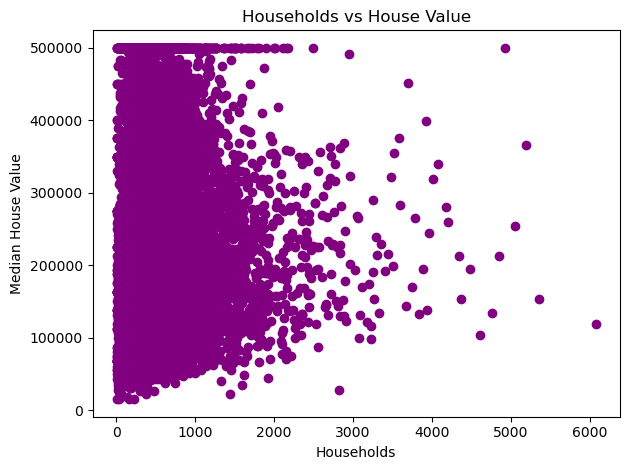

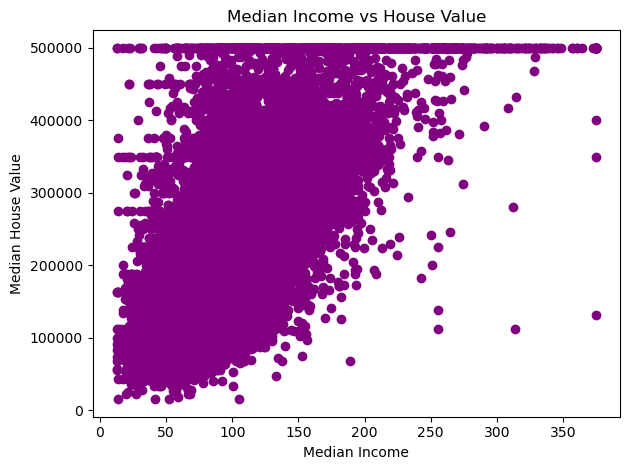

In [462]:
plt.scatter(x=df["population"], y=df["median_house_value"], color = "orange")
plt.title("Population vs House Value")
plt.xlabel("Population")
plt.ylabel("Median House Value")
plt.tight_layout() 
plt.show()

plt.scatter(x=df["households"], y=df["median_house_value"],color = "purple")
plt.title("Households vs House Value")
plt.xlabel("Households")
plt.ylabel("Median House Value")
plt.tight_layout()
plt.show()

plt.scatter(x=df["median_income"], y=df["median_house_value"],color = "purple")
plt.title("Households vs House Value")
plt.title("Median Income vs House Value")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.tight_layout()
plt.show()

Question 2

In [464]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_household'] = df['total_bedrooms'] / df['households']
df['rooms_per_pop'] = df['total_rooms'] / df['population']
df['bedrooms_per_pop'] = df['total_bedrooms'] / df['population']

In [465]:
print( df["rooms_per_household"].corr(df["median_house_value"]))
print(df["bedrooms_per_household"].corr(df["median_house_value"]))
print(df["rooms_per_pop"].corr(df["median_house_value"]))
print(df["bedrooms_per_pop"].corr(df["median_house_value"]))

0.15194828974145796
0.0582604339126752
0.20948196900668967
0.11309509846221796


Question 3

In [467]:
predictors = ['housing_median_age', 'rooms_per_household', 'bedrooms_per_household', 'rooms_per_pop', 'bedrooms_per_pop','population', 'households', 
              'median_income', 'ocean_proximity']

In [468]:
for var in predictors:
    X = df[var].values.reshape(-1, 1)
    y = df['median_house_value'].values.reshape(-1, 1)
    model = LinearRegression().fit(X, y)
    rSqr = model.score(X,y)
    print(var, rSqr)

housing_median_age 0.011156305266710853
rooms_per_household 0.023088282755354128
bedrooms_per_household 0.003394278159693398
rooms_per_pop 0.043882695338919864
bedrooms_per_pop 0.012790501296178869
population 0.0006076066693256887
households 0.0043352546340906795
median_income 0.47344749180719903
ocean_proximity 0.15780848616855125


In [469]:

scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[predictors] = scaler.fit_transform(df[predictors])

In [470]:
sns.scatterplot(x=df_standardized["median_income"], y=df['median_house_value'], alpha=0.5)

<Axes: xlabel='median_income', ylabel='median_house_value'>

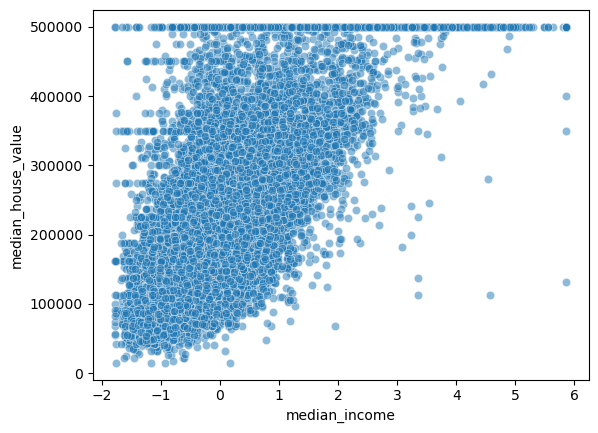

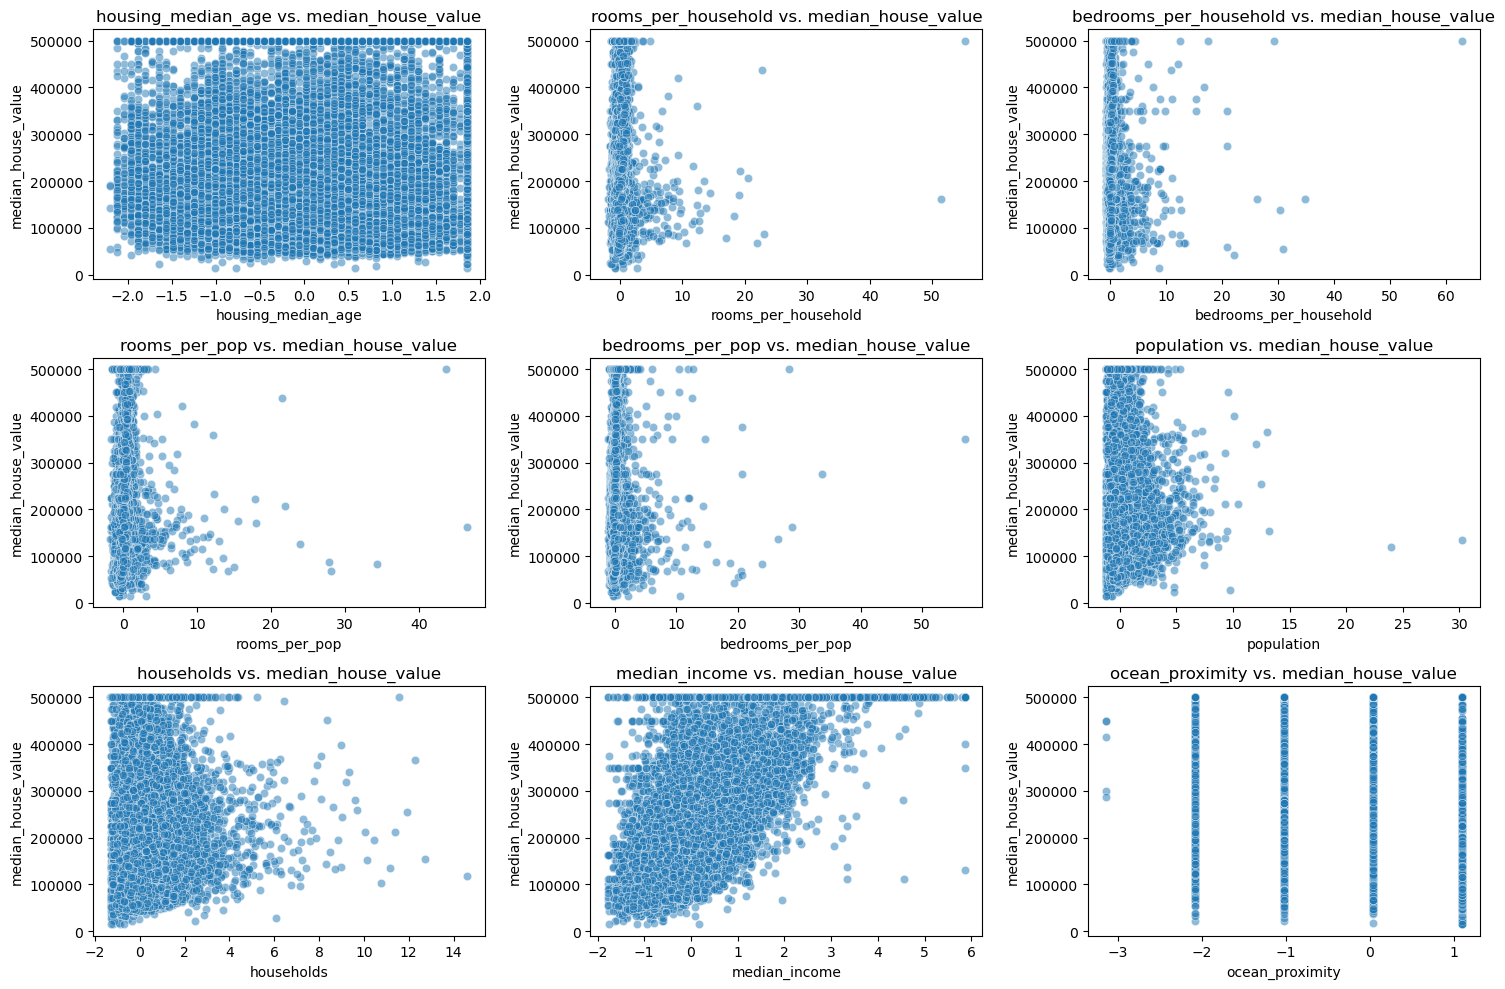

In [471]:
plt.figure(figsize=(15, 10))

for i, predictor in enumerate(predictors, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=df_standardized[predictor], y=df['median_house_value'], alpha=0.5)
    plt.xlabel(predictor)
    plt.ylabel("median_house_value")
    plt.title(f"{predictor} vs. median_house_value")

plt.tight_layout()
plt.show()

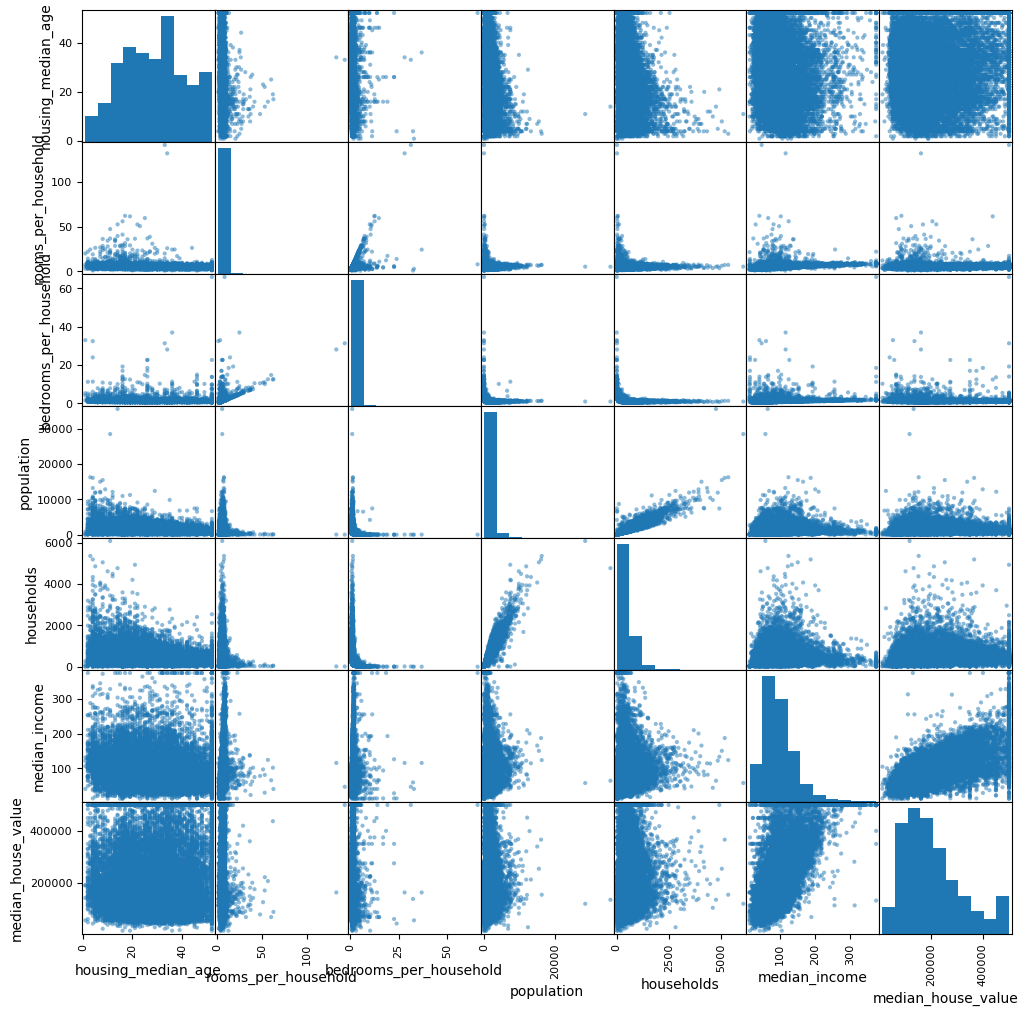

In [472]:
newdata = pd.DataFrame(df, columns = ['housing_median_age', 'rooms_per_household', 'bedrooms_per_household','population','households', 
              'median_income','median_house_value'])
pd.plotting.scatter_matrix(newdata, figsize=(12, 12))
plt.show()

Question 4

In [474]:
predictors = ['housing_median_age', 'rooms_per_household', 'bedrooms_per_household','population', 'households', 
              'median_income', 'ocean_proximity']
X_multi = df[predictors]
y = df['median_house_value']
model_multi = LinearRegression().fit(X_multi, y)
y_multi_pred = model_multi.predict(X_multi)

In [475]:
rSqr = model_multi.score(X_multi, y)
n = X_multi.shape[0]
p = X_multi.shape[1]
adjusted_rSqr = 1 - ( ((1 - rSqr) * (n - 1)) / (n - p - 1) )
print(rSqr)
print(adjusted_rSqr)

0.599162410783781
0.5990264150914335


Inputs :        housing_median_age  rooms_per_household  bedrooms_per_household  \
0                      41             6.984127                1.769841   
1                      21             6.238137                1.175747   
2                      52             8.288136                1.853107   
3                      52             5.817352                1.337900   
4                      52             6.281853                1.378378   
...                   ...                  ...                     ...   
20635                  25             5.045455                1.103030   
20636                  18             6.114035                1.666667   
20637                  17             5.205543                1.083141   
20638                  18             5.329513                1.143266   
20639                  16             5.254717                1.066038   

       population  households  median_income  ocean_proximity  
0             322         126       20

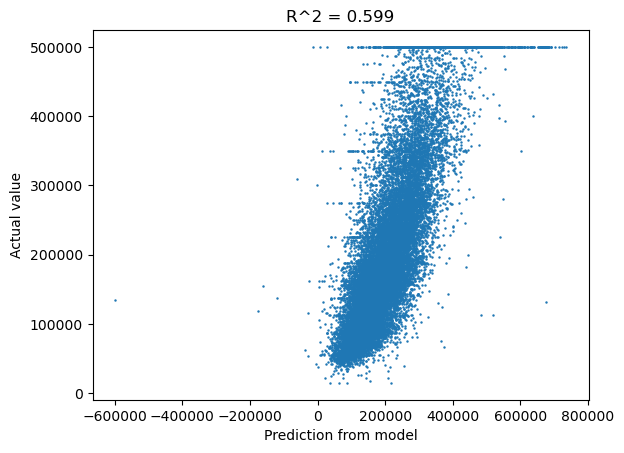

In [476]:
y_multi_pred = model_multi.predict(X_multi)
print("Inputs :" , X_multi)
print(f"Labels : {y}, predictions : {y_multi_pred}")
plt.plot(y_multi_pred,y,'o',markersize=.75) 
plt.xlabel('Prediction from model') 
plt.ylabel('Actual value')  
plt.title('R^2 = {:.3f}'.format(rSqr))
plt.show()

Question 5

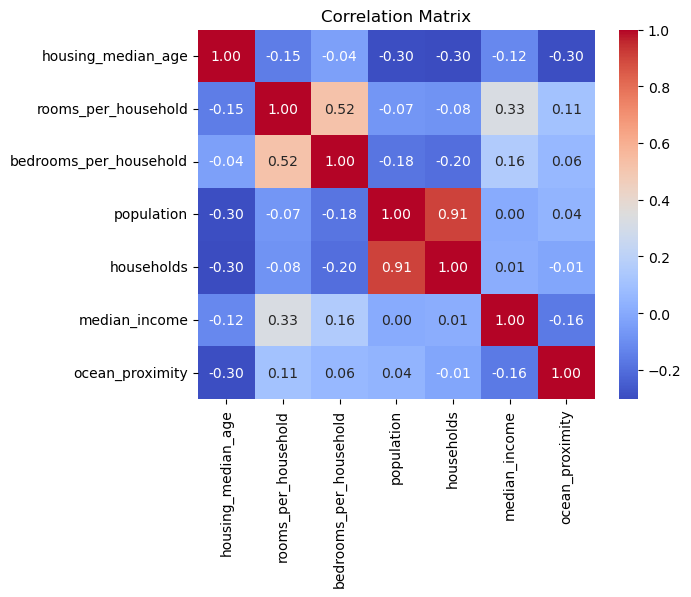

In [478]:
correlation_matrix = df[predictors].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

housing_median_age


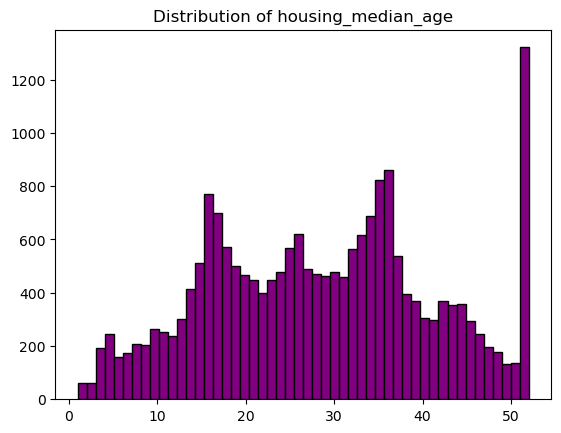

population


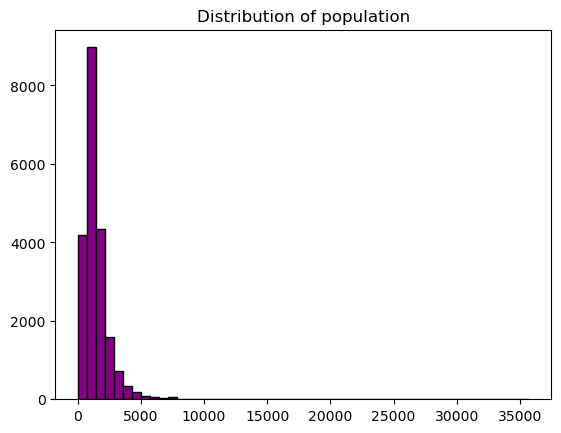

households


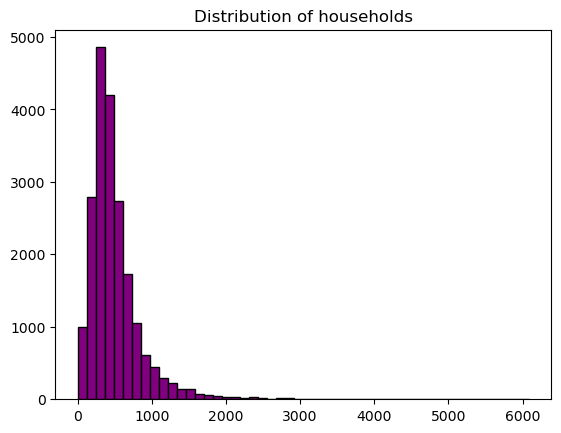

median_income


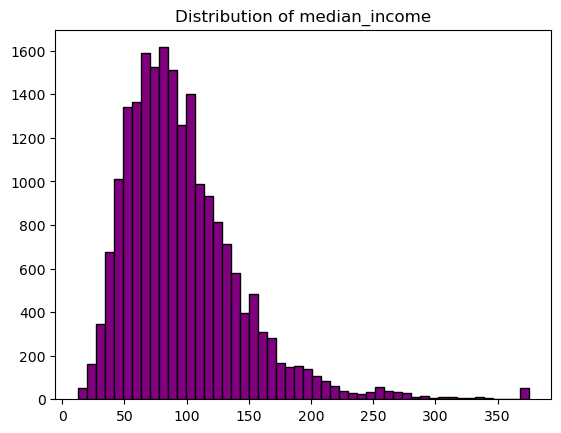

In [525]:
for var in predictors:
    plt.hist(df[var], bins=50, color='purple', edgecolor='black')
    plt.title(f"Distribution of {var}")
    print(var)
    plt.show()

In [480]:
print(df["median_house_value"].value_counts())
print(max(df["median_house_value"]))

median_house_value
500001    965
137500    122
162500    117
112500    103
187500     93
         ... 
359200      1
54900       1
377600      1
81200       1
47000       1
Name: count, Length: 3842, dtype: int64
500001


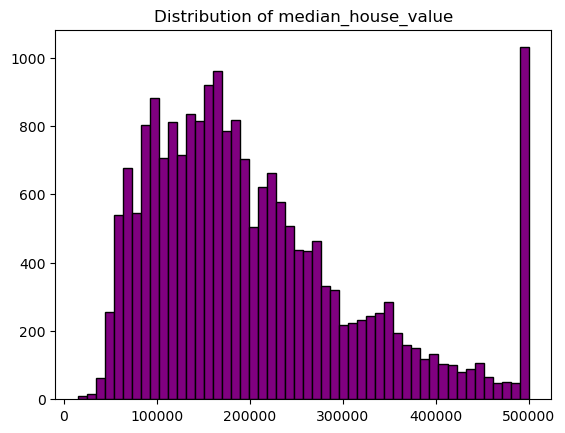

In [527]:
plt.hist(df["median_house_value"], bins=50, color='purple', edgecolor='black')
plt.title("Distribution of median_house_value")
plt.show()

In [482]:
predictors = ['housing_median_age','median_income']
X_multi = df[predictors]
y = df['median_house_value']
model_multi = LinearRegression().fit(X_multi, y)
y_multi_pred = model_multi.predict(X_multi)
rSqr = model_multi.score(X_multi, y)
print(rSqr)
coefficients = model_multi.coef_
print("Coefficients:", coefficients)

coef_dict = dict(zip(predictors, coefficients))
print("Coefficients with predictor names:", coef_dict)

0.5091195899765226
Coefficients: [1744.13444566 1726.76763018]
Coefficients with predictor names: {'housing_median_age': 1744.1344456555275, 'median_income': 1726.7676301798058}


In [483]:
predictors = ['housing_median_age', 'rooms_per_household', 'bedrooms_per_household', 
              'median_income']
X_multi = df[predictors]
y = df['median_house_value']
model_multi = LinearRegression().fit(X_multi, y)
y_multi_pred = model_multi.predict(X_multi)
rSqr = model_multi.score(X_multi, y)
print(rSqr)
coefficients = model_multi.coef_
print("Coefficients:", coefficients)

coef_dict = dict(zip(predictors, coefficients))
print("Coefficients with predictor names:", coef_dict)

0.5125944224834318
Coefficients: [ 1692.58210012 -2073.86817676 -2914.50891769  1770.33909108]
Coefficients with predictor names: {'housing_median_age': 1692.5821001221282, 'rooms_per_household': -2073.8681767572743, 'bedrooms_per_household': -2914.5089176894376, 'median_income': 1770.3390910819219}


In [484]:
predictors = ['housing_median_age','population', 'households', 
              'median_income']
X_multi = df[predictors]
y = df['median_house_value']
model_multi = LinearRegression().fit(X_multi, y)
y_multi_pred = model_multi.predict(X_multi)
rSqr = model_multi.score(X_multi, y)
print(rSqr)
coefficients = model_multi.coef_
print("Coefficients:", coefficients)

coef_dict = dict(zip(predictors, coefficients))
print("Coefficients with predictor names:", coef_dict)

0.5549564189623353
Coefficients: [2000.54387192  -43.04493385  152.70026145 1723.79670351]
Coefficients with predictor names: {'housing_median_age': 2000.5438719158244, 'population': -43.04493385301628, 'households': 152.70026144638828, 'median_income': 1723.796703505271}


In [517]:
variables = ['housing_median_age', 'rooms_per_household', 'bedrooms_per_household','population', 'households', 
              'median_income', 'ocean_proximity']
for var in variables:
    print(f'{var}: Skewness = {df[var].skew():.4f}, Kurtosis = {df[var].kurtosis():.4f}')
print(f'{"house_value"}: Skewness = {df["median_house_value"].skew():.4f}, Kurtosis = {df["median_house_value"].kurtosis():.4f}')

housing_median_age: Skewness = 0.0603, Kurtosis = -0.8006
rooms_per_household: Skewness = 20.6979, Kurtosis = 879.3533
bedrooms_per_household: Skewness = 24.3850, Kurtosis = 1048.7274
population: Skewness = 4.9359, Kurtosis = 73.5531
households: Skewness = 3.4104, Kurtosis = 22.0580
median_income: Skewness = 1.6467, Kurtosis = 4.9525
ocean_proximity: Skewness = -0.7308, Kurtosis = -0.2900
house_value: Skewness = 0.9778, Kurtosis = 0.3279
